In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
def plotLoss(data, title, tag=""):
    fig = plt.figure()
    plt.plot(data[:, 0])
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.xlim(-50, 1000)
    #plt.savefig(title + "_losses.png")

def losses(h5file):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["discriminator_fake"])
    discriminator_real = np.asarray(f["discriminator_real"])
    generator = np.asarray(f["generator"])
    f.close()
    
    plotLoss(discriminator, "discriminator")
    plotLoss(discriminator_real, "discriminator_real")
    plotLoss(discriminator_fake, "discriminator_fake")
    plotLoss(generator, "generator")

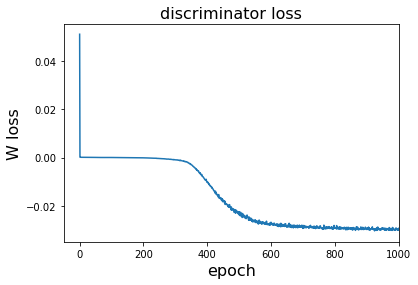

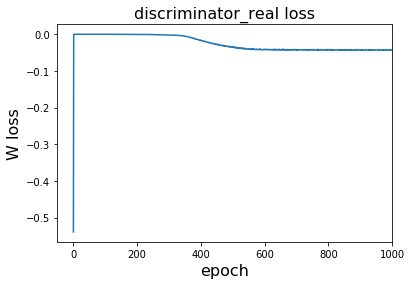

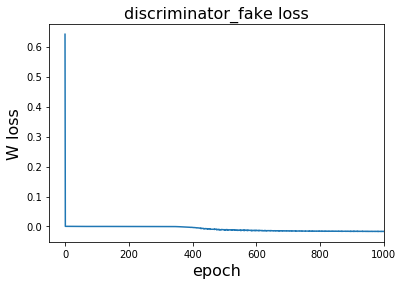

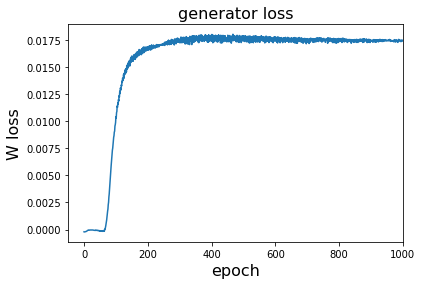

In [8]:
losses("trial3_batch_size_128_epochs_2000/trial3_bs_128_losses.h5")

In [29]:
#losses("val_trial2_losses.h5")

In [32]:
def plotLossVal(loss, val_loss, title, tag=""):
    fig = plt.figure()
    plt.plot(loss[:, 0], label="train", color='blue', alpha=0.3)
    plt.plot(val_loss[:, 0], label="validation", color='red', alpha=0.3)
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.legend(prop={'size': 15})
    #plt.xlim(-50, 1000)
    #plt.savefig(title + "_losses_val.png")
    plt.show()

def lossesVal(h5file, h5file_val):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["discriminator_fake"])
    discriminator_real = np.asarray(f["discriminator_real"])
    generator = np.asarray(f["generator"])
    f.close()
    
    g = h5py.File(h5file_val, "r")
    val_discriminator = np.asarray(g["discriminator"])
    val_discriminator_fake = np.asarray(g["discriminator_fake"])
    val_discriminator_real = np.asarray(g["discriminator_real"])
    #generator = np.asarray(f["generator"])
    g.close()
    
    plotLossVal(discriminator, val_discriminator, "discriminator")
    plotLossVal(discriminator_real, val_discriminator_real, title="discriminator_real")
    plotLossVal(discriminator_fake, val_discriminator_fake, title="discriminator_fake")
    #plotLoss(generator, "generator")

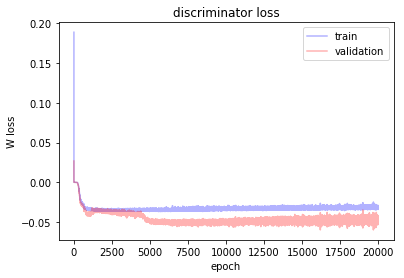

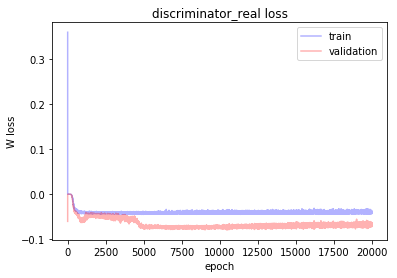

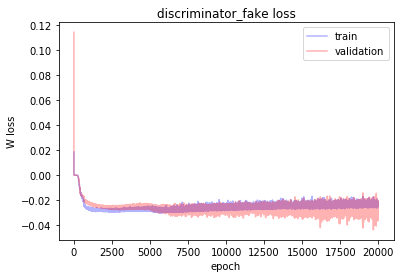

In [33]:
lossesVal("trial2_batch_size_32_epochs_4000/trial2_losses.h5", "trial2_batch_size_32_epochs_4000/val_trial2_losses.h5")

In [34]:
def plotLoss2(loss, val_loss, title, tag=""):
    fig = plt.figure()
    plt.plot(loss[:, 0], label="bs_32", color='blue', alpha=0.4)
    plt.plot(val_loss[:, 0], label="bs_128", color='red', alpha=0.4)
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.legend(prop={'size': 15})
    plt.xlim(-50, 1000)
    #plt.savefig("compare_bs_32_128_" + title + "_losses.png")
    plt.show()

def losses2(h5file1, h5file2):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file1, "r")
    discriminator1 = np.asarray(f["discriminator"])
    discriminator_fake1 = np.asarray(f["discriminator_fake"])
    discriminator_real1 = np.asarray(f["discriminator_real"])
    generator1 = np.asarray(f["generator"])
    f.close()
    
    g = h5py.File(h5file2, "r")
    discriminator2 = np.asarray(g["discriminator"])
    discriminator_fake2 = np.asarray(g["discriminator_fake"])
    discriminator_real2 = np.asarray(g["discriminator_real"])
    generator2 = np.asarray(g["generator"])
    g.close()
    
    plotLoss2(discriminator1, discriminator2, "discriminator")
    plotLoss2(discriminator_real1, discriminator_real2, "discriminator_real")
    plotLoss2(discriminator_fake1, discriminator_fake2, "discriminator_fake")
    plotLoss2(generator1, generator2, "generator")

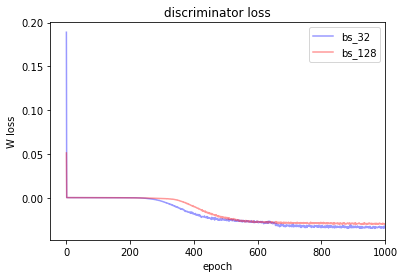

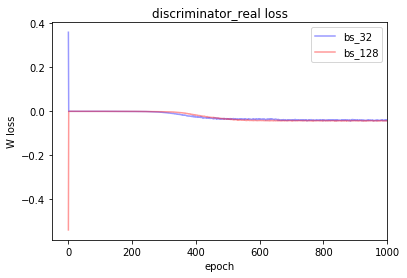

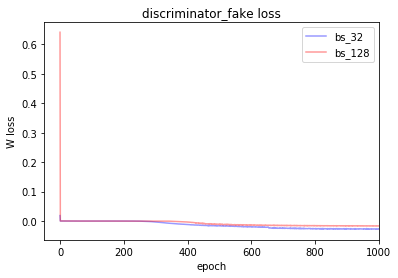

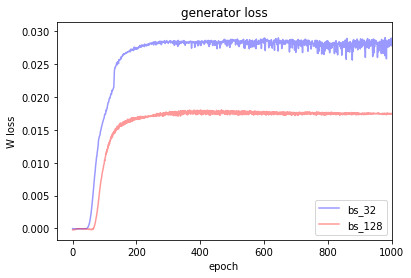

In [36]:
losses2("trial2_batch_size_32_epochs_4000/trial2_losses.h5", "trial3_batch_size_128_epochs_2000/trial3_bs_128_losses.h5")

In [19]:
def plotRealFake(real, fake, title, tag=""):
    fig = plt.figure()
    plt.plot(real[:, 0], label="real", color='blue', alpha=0.5)
    plt.plot(fake[:, 0], label="fake", color='red', alpha=0.5)
    plt.title(tag + title + " loss", size=16)
    plt.xlabel("epoch", size=16)
    plt.ylabel("W loss", size=16)
    plt.legend(prop={'size': 15})
    #plt.savefig(title + "_losses_real_fake.png")
    plt.show()

def lossesRealFake(h5file):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["discriminator_fake"])
    discriminator_real = np.asarray(f["discriminator_real"])
    generator = np.asarray(f["generator"])
    f.close()
    
    plotRealFake(discriminator_real, discriminator_fake, "discriminator")

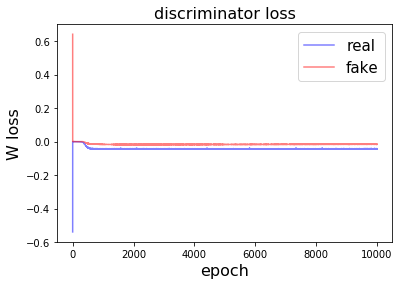

In [20]:
lossesRealFake("trial3_batch_size_128_epochs_2000/trial3_bs_128_losses.h5")